# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [2]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [ ]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

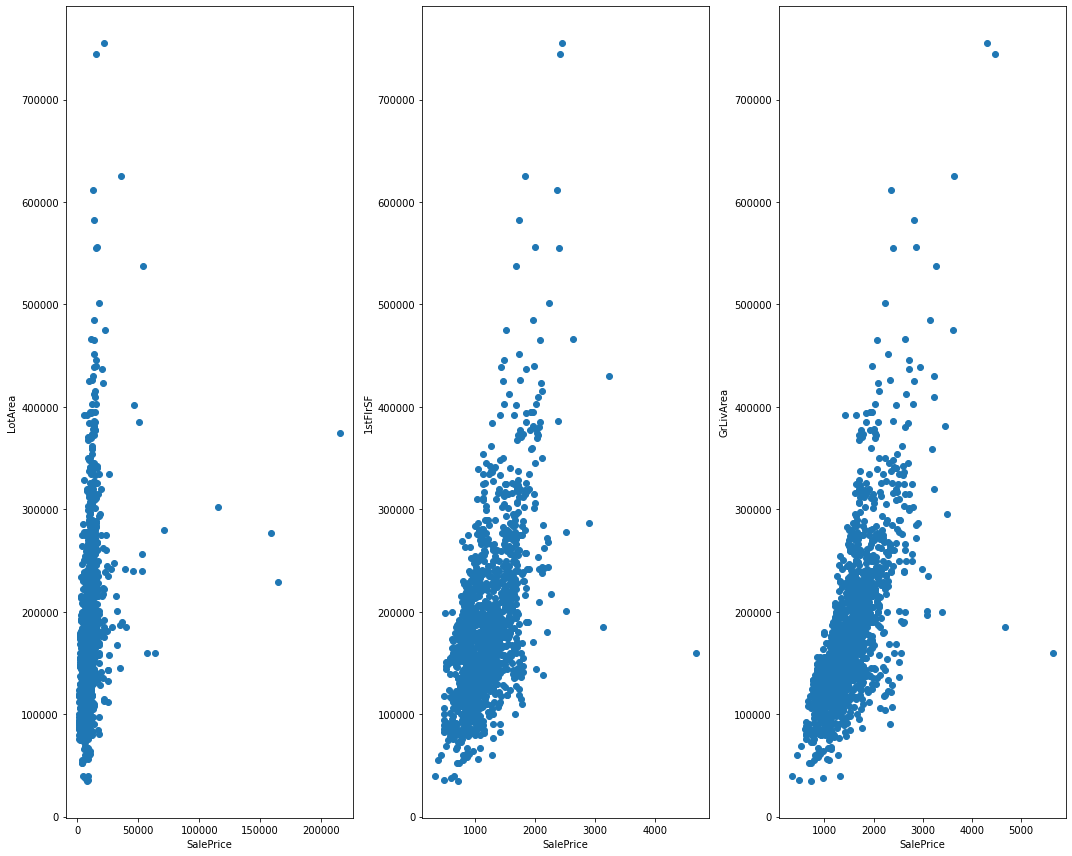

In [5]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize = (15, 12))
ax[0].scatter(ames_subset['LotArea'], ames_subset['SalePrice'])
ax[0].set_xlabel ('SalePrice')
ax[0].set_ylabel ('LotArea')
ax[1].scatter(ames_subset['1stFlrSF'], ames_subset['SalePrice'])
ax[1].set_xlabel ('SalePrice')
ax[1].set_ylabel ('1stFlrSF')
ax[2].scatter(ames_subset['GrLivArea'], ames_subset['SalePrice'])
ax[2].set_xlabel ('SalePrice')
ax[2].set_ylabel ('GrLivArea')
plt.tight_layout()
plt.show()

In [6]:
# Your written answer here - do these seem like good candidates for linear regression?
# GrLivArea and 1stFlrSF see  like a good candidate. They have a strong positive correlation to SalePrice.
#There seem to be no correlation between LotArea  and SalePrice

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [9]:
# Your code here - define y and baseline X
y= ames_subset['SalePrice']
X = ames_subset['GrLivArea']

In [10]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm
baseline_model = sm.OLS(y,sm.add_constant(X))
baseline_results =baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):          4.52e-223
Time:                        23:08:04   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [ ]:
# Your written answer here - interpret model results
#The overall model is statistically significant since the p-value is less than 0.05. 
#approximately 50.2% change in SalePrice is explained by GrLivAres.

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [11]:
# Your code here - define X
X_multiple = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

In [13]:
# Your code here - fit model and display results
multiple_baseline_model = sm.OLS(y, sm.add_constant(X_multiple))
multiple_baseline_results = multiple_baseline_model.fit()
print(multiple_baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Wed, 18 Feb 2026   Prob (F-statistic):          1.57e-262
Time:                        23:11:17   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [14]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
#The overall model is statistically significant since the p-value is less than 0.05. 
#approximately 56.5% change in SalePrice is explained by LotArea, 1stFlrSF, and GrLivAres.
#This model is better than the previous one since it has higher R-squared

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

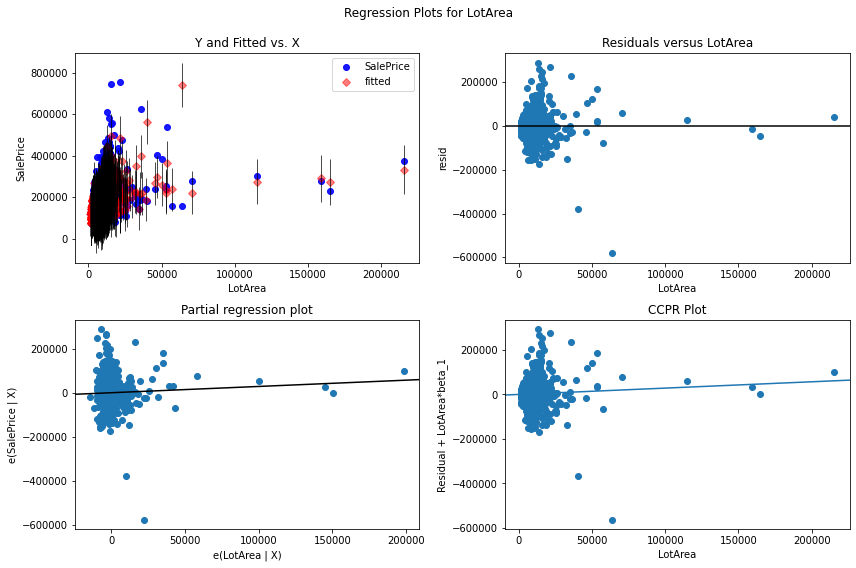

In [26]:
# Your code here - create partial regression plots for each predictor
import statsmodels.graphics.regressionplots as smg
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(multiple_baseline_results, 'LotArea', fig=fig)
#sm.graphics.plot_regress_exog(multiple_baseline_results, '1stFlrSF', fig=fig)
plt.show()

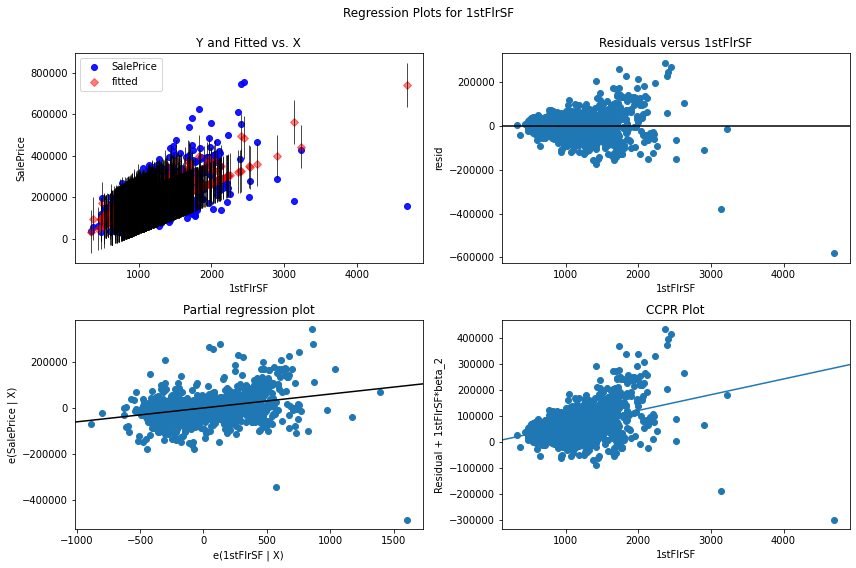

In [28]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(multiple_baseline_results, '1stFlrSF', fig=fig)
plt.show()

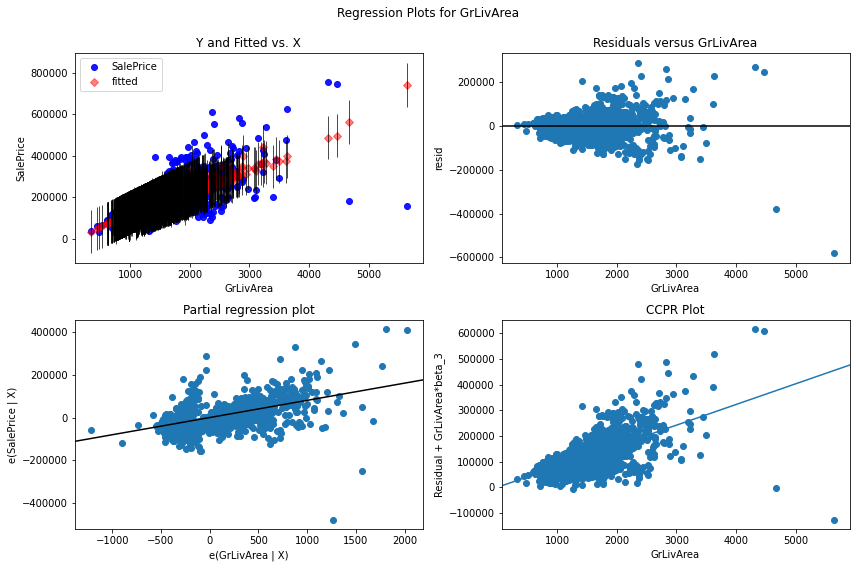

In [29]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(multiple_baseline_results, 'GrLivArea', fig=fig)
plt.show()

In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [30]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
sklearn_baseline_model = LinearRegression()
sklearn_baseline_model.fit(X_multiple, y)


LinearRegression()

In [39]:
# Your code here - compare R-Squared
print(f"""Statsmodel R squared {multiple_baseline_results.rsquared} \n
Sklearn R-squared {sklearn_baseline_model.score(X_multiple, y)}
      """)

Statsmodel R squared 0.5649801771384368 

Sklearn R-squared 0.5649801771384368
      


In [47]:
# Your code here - compare intercept and coefficients
print(f"""Statsmodel intercet {multiple_baseline_results.params["const"]} \n
Sklearn intercept {sklearn_baseline_model.intercept_}
      """)

print(f"""Statsmodel coefficienct {multiple_baseline_results.params[1:].values} \n
Sklearn coefficient {sklearn_baseline_model.coef_}
      """)

Statsmodel intercet -14313.408857494265 

Sklearn intercept -14313.408857494564
      
Statsmodel coefficienct [ 0.28413359 60.28664625 80.60605834] 

Sklearn coefficient [ 0.28413359 60.28664625 80.60605834]
      


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.